<a href="https://colab.research.google.com/github/LuSanchzrh7/cuantica_python_LuisaSanchez_CristianRey/blob/main/Tarea3_Cuantica_numerov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
sns.set()

In [24]:
#Discretización (c)
N=1000
x=np.linspace(-5,5,N)

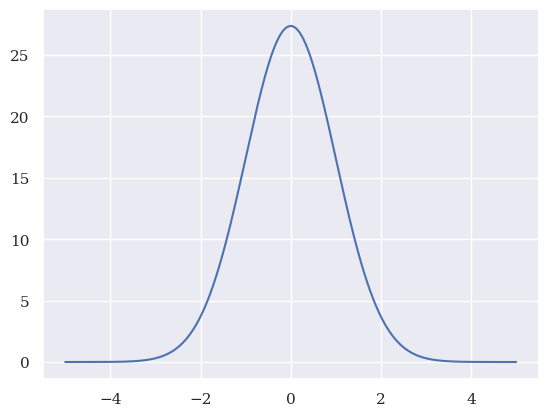

In [25]:
#calculo de potencial (d)
def V(x):
  return 0.5*x**2

#metodo de numerov (e)
def R(x,E):
  return 2*(E - V(x))


def m_numerov(x,E,N): #puse aqui N para no tener que volver a inicializarlo pero es igual que poner dentro de la funcion N=len(x)
  #inicializo cond. dadas y el paso de numerov
  p=x[1]-x[0]
  psi=np.zeros(N)
  psi[1]=1e-5
  r=R(x,E)

  for i in range(1, N-1):
        psi[i+1] = (2*psi[i]*(1 - (5/12)*p**2*r[i]) - psi[i-1]*(1 + (1/12)*p**2*r[i-1])) / (1 + (1/12)*p**2*r[i+1])

  return psi

#prueba 1
psi=m_numerov(x,0.5,N)


plt.rcParams["font.family"] = "serif"
plt.plot(x,psi)

In [26]:
#valores propios del psi (f)

def eigenValues(E_i,x,N,n_EV):
    dE=0.001

    eigen_values_E=np.zeros((n_EV,1))
    for i in range(n_EV):

        while m_numerov(x,E_i,N)[-1]*m_numerov(x,E_i+dE,N)[-1]>0:
            E_i=E_i+dE
        else:
            eigen_values_E[i,0]=E_i
            E_i=E_i+dE
    return eigen_values_E

In [27]:
#formato para E
f="$E_{}={}$"


#espectro del operador (g)
EV=eigenValues(0.2,x,N,6)
for i in range(len(EV)):
  print(f.format(str(i),str(round(EV[i][0],2))))

$E_0=0.5$
$E_1=1.5$
$E_2=2.5$
$E_3=3.5$
$E_4=4.5$
$E_5=5.5$


Text(0, 0.5, '$\\psi$(x)')

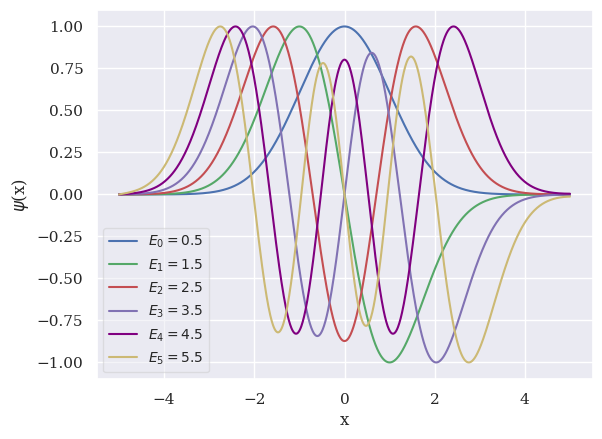

In [28]:
#grafica de 6 psi (normalizadas) (h)

color=['b','g','r','m','purple','y']

def normalizar_psi(psi, x):
    max_value = np.max(np.abs(psi))
    psi_norm = psi / max_value

    return psi_norm

for i in range(len(EV)):
  psi_actual=m_numerov(x,EV[i],N)
  psi_n=normalizar_psi(psi_actual,x)
  plt.plot(x,psi_n,label=f.format(str(i),str(round(EV[i][0],2))),c=color[i])

plt.legend(loc="lower left",fontsize=10,fancybox=True,framealpha=0.5)
plt.xlabel('x')
plt.ylabel('$\psi$(x)')

Eigenvalues: [[-9.509]
 [-8.538]
 [-7.557]
 [-6.483]
 [-5.222]]


Text(0, 0.5, '$\\psi$(x)')

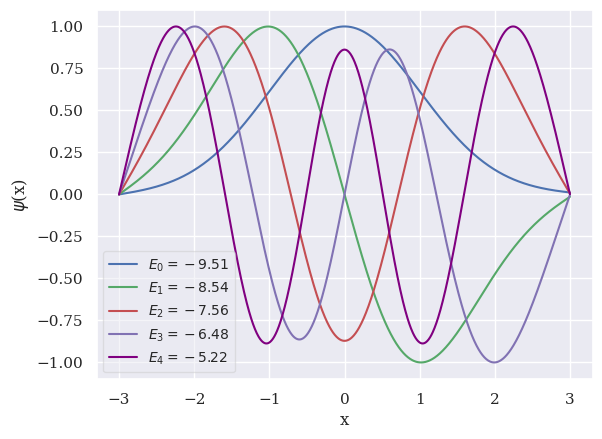

In [34]:
#Potencial Gausiano (i)
x=np.linspace(-3,3,N)
def V2(x_n):
  return -10*np.exp(-x**2/20)
def R(x_n,E):
  return 2*(E - V2(x))

eigenvalues = eigenValues(-10, x, 1000, 5)
print("Eigenvalues:", eigenvalues)

for i in range(len(eigenvalues)):
  psi_actual=m_numerov(x,eigenvalues[i],N)
  psi_n=normalizar_psi(psi_actual,x)
  plt.plot(x,psi_n,label=f.format(str(i),str(round(eigenvalues[i][0],2))),c=color[i])

plt.legend(loc="lower left",fontsize=10,fancybox=True,framealpha=0.5)
plt.xlabel('x')
plt.ylabel('$\psi$(x)')

#tener en cuenta que los valores quiza estan variando un poco por el intervalo tan pequeño que se esta dando

Eigenvalues: [[-2.466]
 [-0.19 ]]


Text(0, 0.5, '$\\psi$(x)')

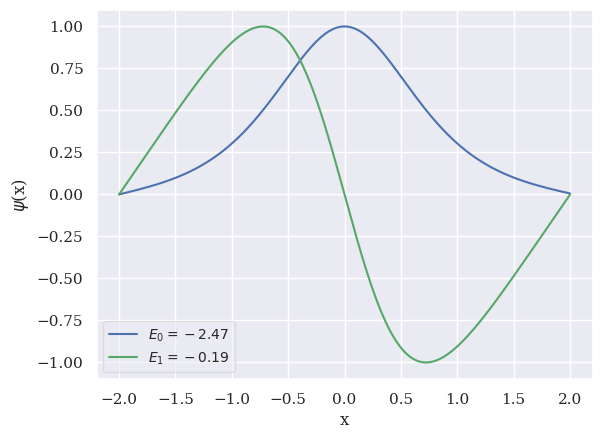

In [35]:
#Potencial racional (j)
x=np.linspace(-2,2,N)
def V3(x_n):
  return -4/((1 + x**2)**2)
def R(x_n,E):
  return 2*(E - V3(x))

eigenvalues = eigenValues(-3, x, 1000, 2)
print("Eigenvalues:", eigenvalues)

for i in range(len(eigenvalues)):
  psi_actual=m_numerov(x,eigenvalues[i],N)
  psi_n=normalizar_psi(psi_actual,x)
  plt.plot(x,psi_n,label=f.format(str(i),str(round(eigenvalues[i][0],2))),c=color[i])

plt.legend(loc="lower left",fontsize=10,fancybox=True,framealpha=0.5)
plt.xlabel('x')
plt.ylabel('$\psi$(x)')